alt.Chart(...)

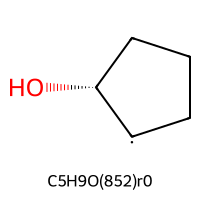

Direct products:


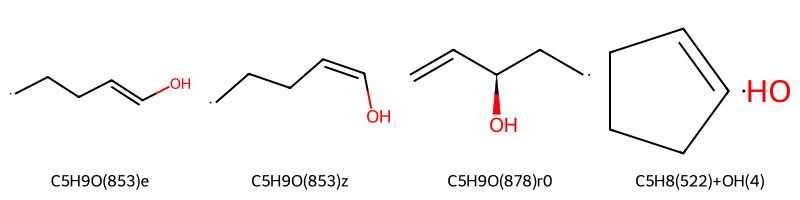

Well-skipping products:


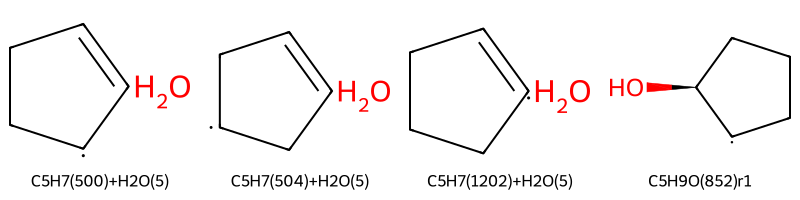

alt.Chart(...)

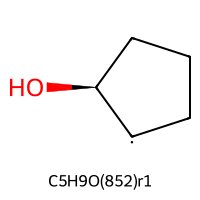

Direct products:


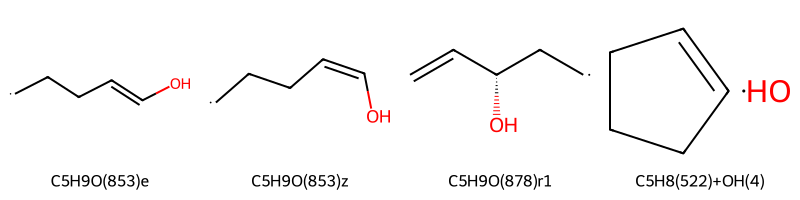

Well-skipping products:


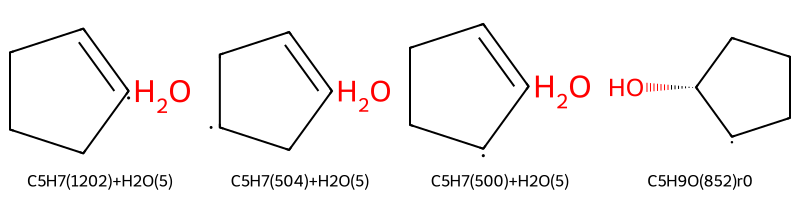

alt.Chart(...)

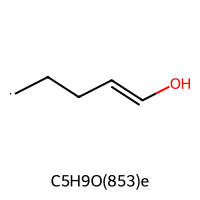

Direct products:


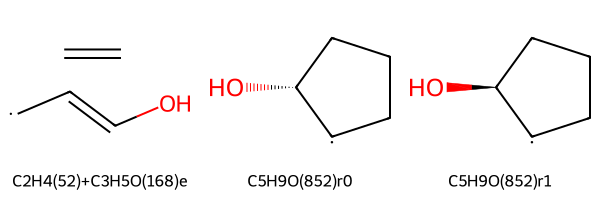

Well-skipping products:


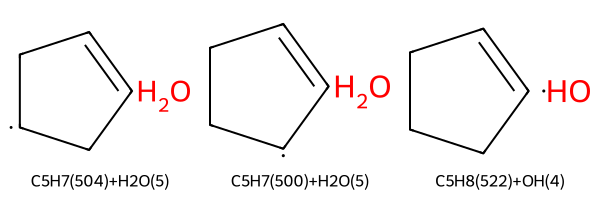

alt.Chart(...)

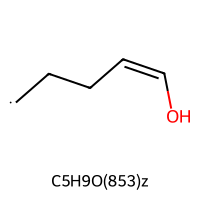

Direct products:


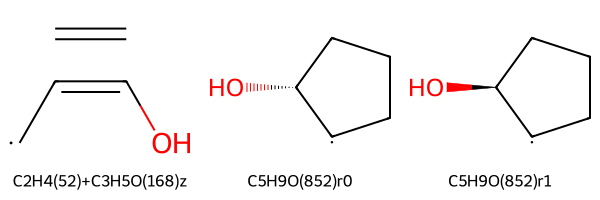

Well-skipping products:


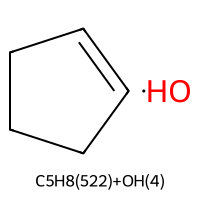

alt.Chart(...)

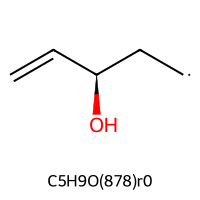

Direct products:


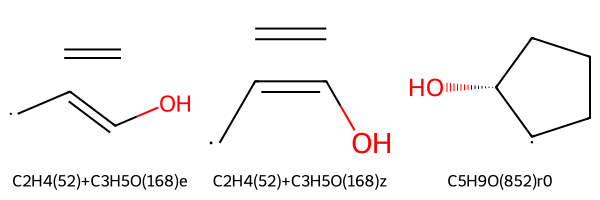

Well-skipping products:


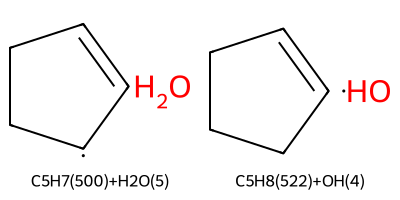

alt.Chart(...)

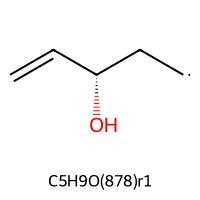

Direct products:


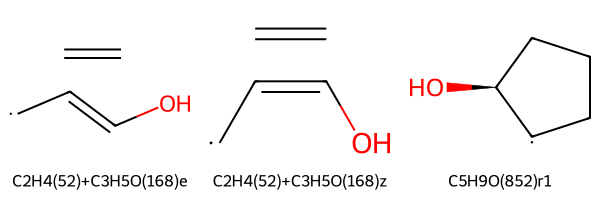

Well-skipping products:


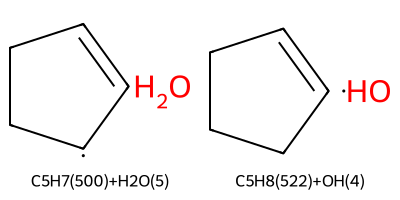

alt.Chart(...)

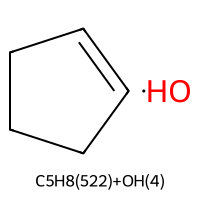

Direct products:


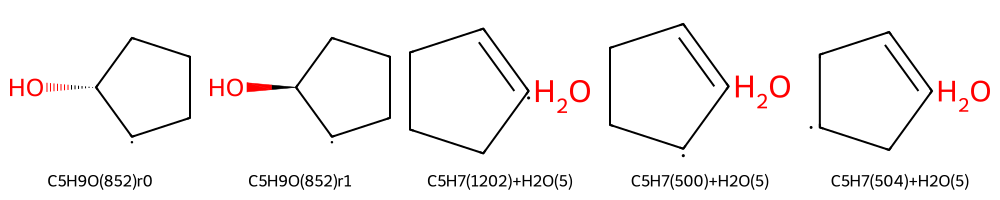

Well-skipping products:


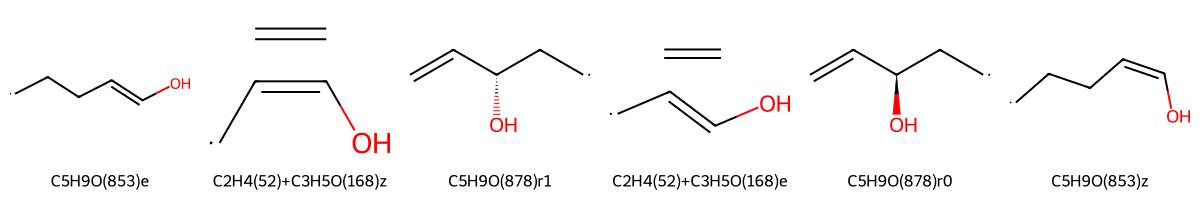

alt.Chart(...)

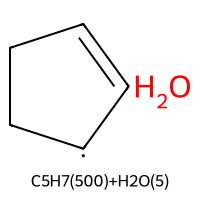

Direct products:


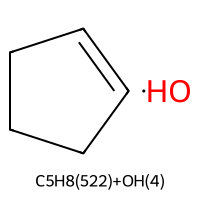

Well-skipping products:


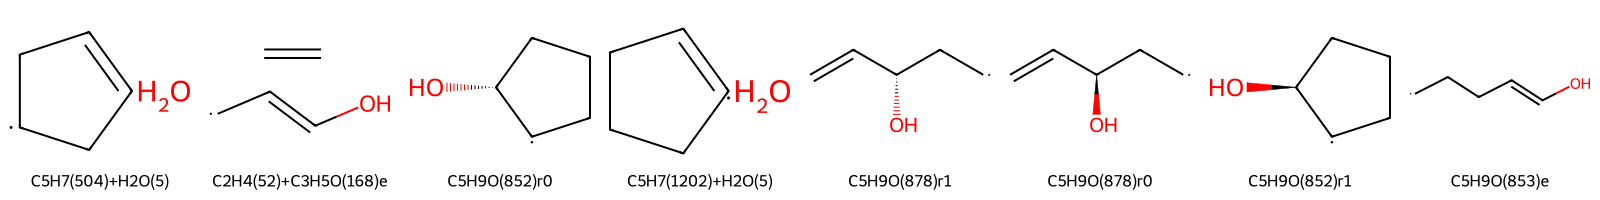

alt.Chart(...)

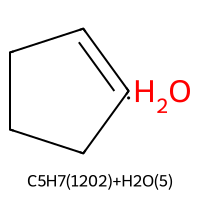

Direct products:


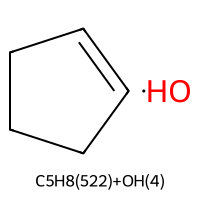

Well-skipping products:


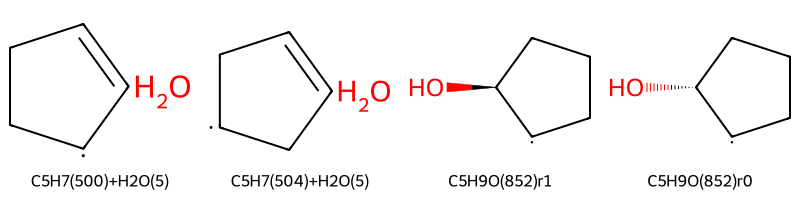

alt.Chart(...)

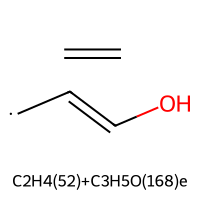

Direct products:


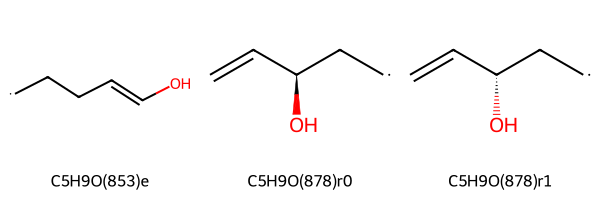

Well-skipping products:


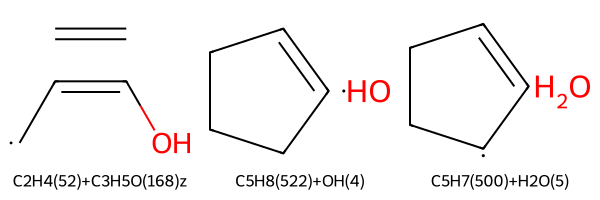

In [4]:
from pathlib import Path

import automech as am
from project_utilities import p_

T_range = (300, 1200)

stoich = "C5H7"
stoich = "C5H7O2"
stoich = "C5H9"
stoich = "C5H9O"
tag = "Z_mess_v0"
root_path = Path("..")

calc_mech_json = p_.calculated_pes_mechanism(
    tag, stoich, "json", path=p_.data(root_path)
)
calc_mech = am.io.read(calc_mech_json)
am.display_branching_fractions(calc_mech, T_range=T_range)